# Eurofer Properties Database



## Table of Contents
- [Abstract](#abstract)
- [Introduction](#introduction)
- [Section 1: Manufacturing & Heat Treatment](#section-1)
  - [Composition](#composition)
  - [Heat Treatment](#heat_treatment)
  - [Product Forms](#forms)
  - [Microstructure](#microstructure)
- [Section 2: Thermo-physical Properties](#section-2)
  - [Density](#density)
  - [Thermal Diffusivity](#diffusivity)
  - [Specific Heat](#cp)
  - [Thermal Conductivity](#conductivity)
  - [Coefficient of Thermal Expansion](#expansion)
  - [Thermal Emissivity](#emissivity)
  - [Electrical Resistivity](#resistivity)
  - [Magnetic Properties](#magnetic)
  - [Elastic Properties](#elastic)
- [Section 3: Mechanical Properties](#mechanical)

<a id="abstract"></a>
<h2 style="text-align: center;">Abstract</h2>
<p style="text-align: justify;">
We present a comprehensive database for the ferritic-martensitic steel Eurofer97.  The database is intended to assist in the mechanical design of components manufactured from reduced activation 9 Cr steels (e.g. Eurofer97), in particular, in a fusion reactor power source.  The database is classified into three main categories: (1) fabrication and microstructure, (2) thermophysical properties, and (3) mechanical properties.  The effects of irradiation (both neutron and ion) on the properties of Eurofer are also discussed. Data for each property is collected from various sources available in the public domain.  The sources of data are given together with links to the original publication for verification or corrections. Various functional forms are developed to describe the properties of Eurofer97 as a function of temperature, and if available, as a function of the irradiation dose.
</p>

<a id="introduction"></a>
<h2>Introduction</h2>

<a id="section-1"></a>
<h2>Section 1: Manufacturing & Heat Treatment</h2>



<a id="section-2"></a>
<h2>Section 2: Thermophysical Properties</h2>

<a id="density"></a>
<h3>2.1. Density</h3>

In [1]:
%run Model_utilities.ipynb
%run Plot_utilities.ipynb

# Excel spreadsheet and material name strings
excel_filename = 'Eurofer_data.xlsx'

# Load excel data for desired property name
material_property = "Eurofer_density"

# Load the data from the Excel file

# 3rd argument is header_rows_list, containing a minimum of 1 and a maximum of 2 row integers
# Denotes what rows to consider in constructing variable names -
# If two row integers are given, then the first row (e.g. material name) is used as a prefix,
# while the second row (e.g. indepedent or dependent variable) is used as a suffix.
# If two row integers are given, it is assume that the format is:
# |                  Material Name 1              |   ...   |                  Material Name n              |
# | Independent variable 1 | Dependent variable 1 |   ...   | Independent variable n | Dependent variable n |

# If only one row integers are given, it is assume that the format is:
# | Independent variable 1 | Dependent variable 1 |   ...   | Independent variable n | Dependent variable n |

# Row integers start counting from 1 like in an Excel spreadsheet.

# 4th argument is num_data_rows, which is how many rows contain data.

load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=8, room_temp=293)

,EUROFER97Tavassoli2004TempK,EUROFER97Tavassoli2004DensityKg_m_3
0,293,7750
1,373,7728
2,473,7699
3,573,7666
4,673,7633
5,773,7596
6,873,7558
7,,


,EUROFER97Tavassoli2004TempK,EUROFER97Tavassoli2004DensityKg_m_3
0,293,7750
1,373,7728
2,473,7699
3,573,7666
4,673,7633
5,773,7596
6,873,7558


['EUROFER97Tavassoli2004TempK', 'EUROFER97Tavassoli2004DensityKg_m_3']


**Fitting parameters for Eurofer Eurofer_density** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 7
    # variables        = 3
    chi-square         = 1.01777725
    reduced chi-square = 0.25444431
    Akaike info crit   = -7.49802348
    Bayesian info crit = -7.66029303
    R-squared          = 0.99996549
[[Variables]]
    a: -1.1119e-04 +/- 5.9091e-06 (5.31%) (init = 1)
    b: -0.20182687 +/- 0.00693480 (3.44%) (init = 1)
    c:  7818.78692 +/- 1.86441851 (0.02%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9901
    C(b, c) = -0.9810
    C(a, c) = +0.9482


**The equation for Eurofer Eurofer_density is:**


-0.000111192*T**2 - 0.201827*T + 7818.79

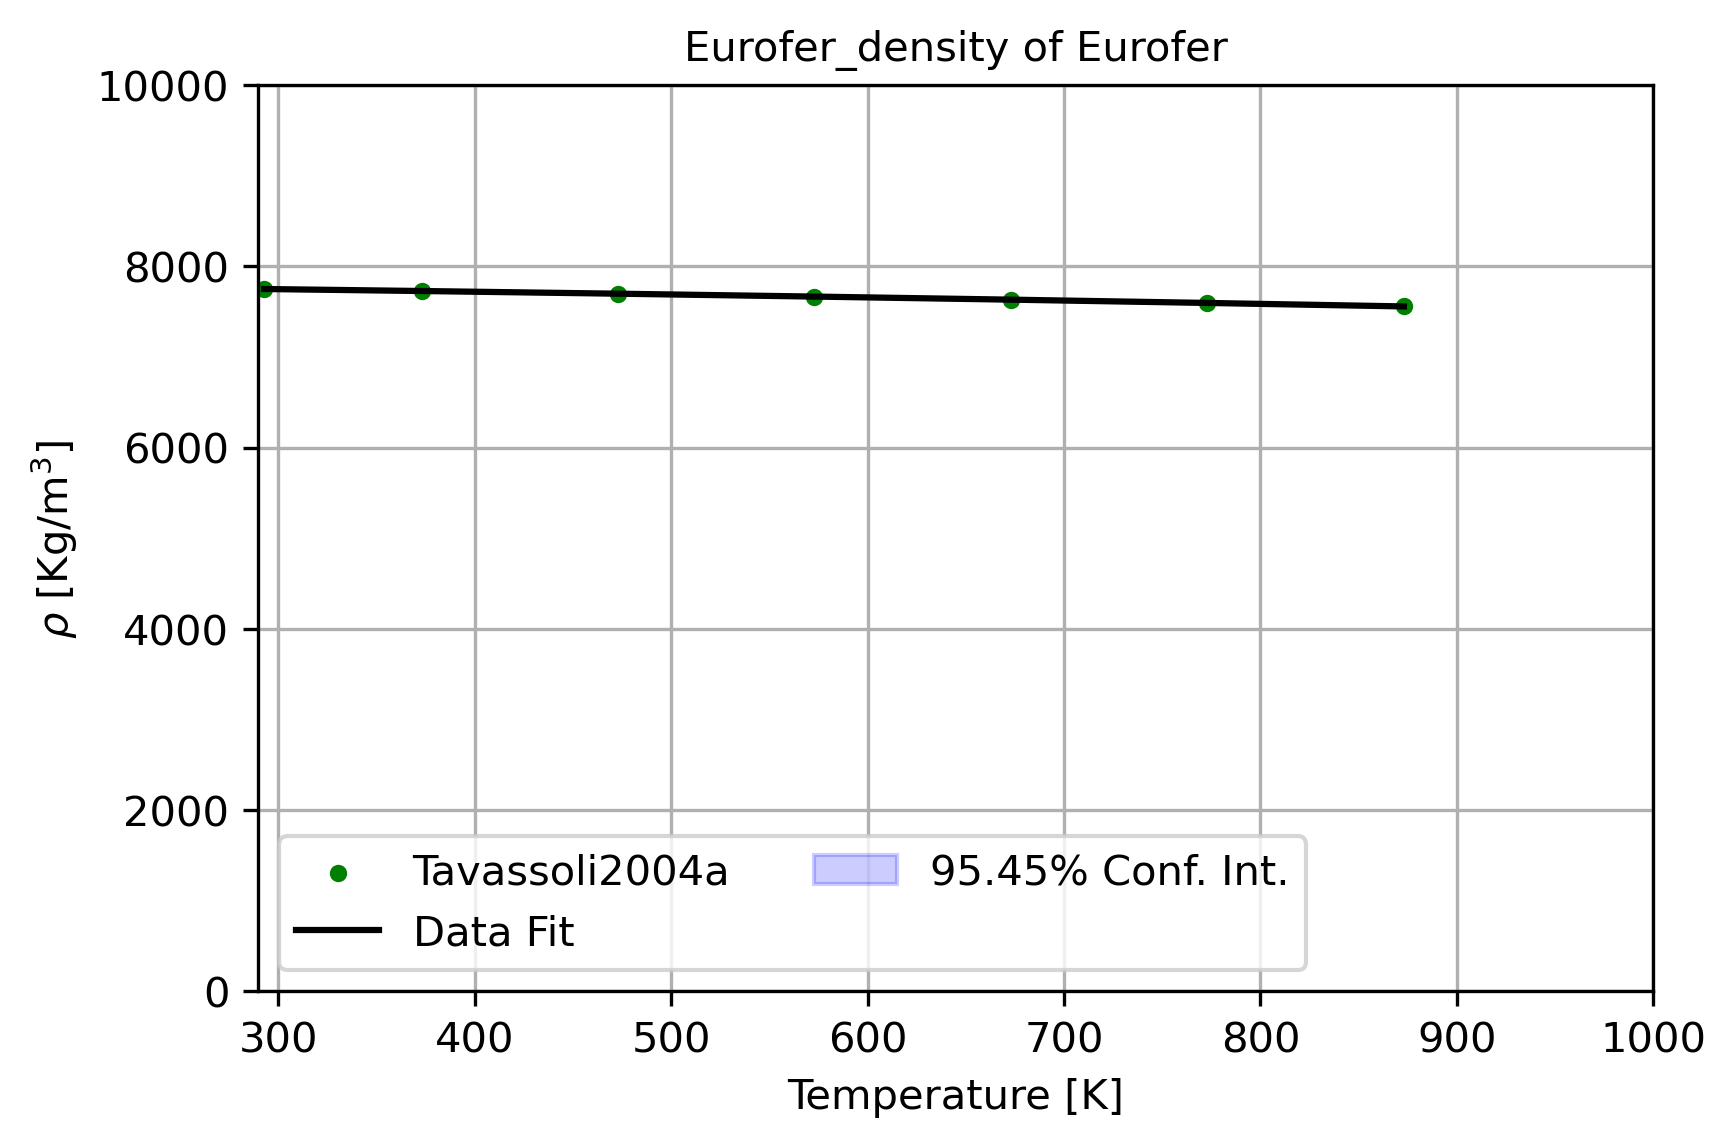

In [2]:
%run Model_utilities.ipynb
%run Plot_utilities.ipynb

# Excel spreadsheet and material name strings
excel_filename = 'Eurofer_data.xlsx'
material_name = "Eurofer"

# Font and marker sizes for plotting
fsize = 10 # font size
msize = 10 # marker size

# Load excel data for desired property name
material_property = "Eurofer_density"
load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7, room_temp=293)
# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

print(var_names)

# Concatenate and sort data for fitting
variables = [globals()[var_name] for var_name in var_names]
vars_x = variables[::2] 
vars_y = variables[1::2]

T, rho = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Tavassoli2004a']

fit_result = get_model_fit_and_print_it(T, rho, fit_func='poly', poly_deg=2,\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\rho$ [Kg/m$^3$]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 10000], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, rho, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

Data Source:[Tavassoli 2004](https://github.com/ZapOrg/ZapRepo/blob/main/RAFM%20Steels/Eurofer/Tavassoli2004--Fusion%20Demo%20Interim%20Structural%20Design%20Criteria%20(DISDC).pdf.pdf)

<a id=diffusivity></a>
<h3>2.2. Thermal Diffusivity</h3>

In [3]:
# Excel spreadsheet and material name strings
excel_filename = 'Eurofer_data.xlsx'

# Load excel data for desired property name
material_property = "Eurofer_diffusivity"

load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=11, room_temp=293)

,EUROFER97MergiaTempK,EUROFER97MergiaThermalDiffusivityCoefcm2_s
0,295.595855,0.081641
1,322.797927,0.080790
2,373.316062,0.077536
3,472.797927,0.075784
4,573.056995,0.070729
5,673.316062,0.064822
6,772.797927,0.058014
7,873.056995,0.050256
8,NaN,NaN
9,NaN,NaN


['EUROFER97MergiaTempK', 'EUROFER97MergiaThermalDiffusivityCoefcm2_s']


**Fitting parameters for Eurofer Eurofer_diffusivity** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 8
    # variables        = 4
    chi-square         = 2.4812e-06
    reduced chi-square = 6.2029e-07
    Akaike info crit   = -111.889799
    Bayesian info crit = -111.572033
    R-squared          = 0.99725225
[[Variables]]
    a: -3.5759e-11 +/- 6.0929e-11 (170.38%) (init = 1)
    b:  1.2037e-08 +/- 1.0716e-07 (890.27%) (init = 1)
    c: -2.8541e-05 +/- 5.9295e-05 (207.75%) (init = 1)
    d:  0.08964800 +/- 0.01017097 (11.35%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9965
    C(b, c) = -0.9957
    C(c, d) = -0.9950
    C(a, c) = +0.9847
    C(b, d) = +0.9822
    C(a, d) = -0.9646


**The equation for Eurofer Eurofer_diffusivity is:**


-3.57594e-11*T**3 + 1.20368e-8*T**2 - 2.85414e-5*T + 0.089648

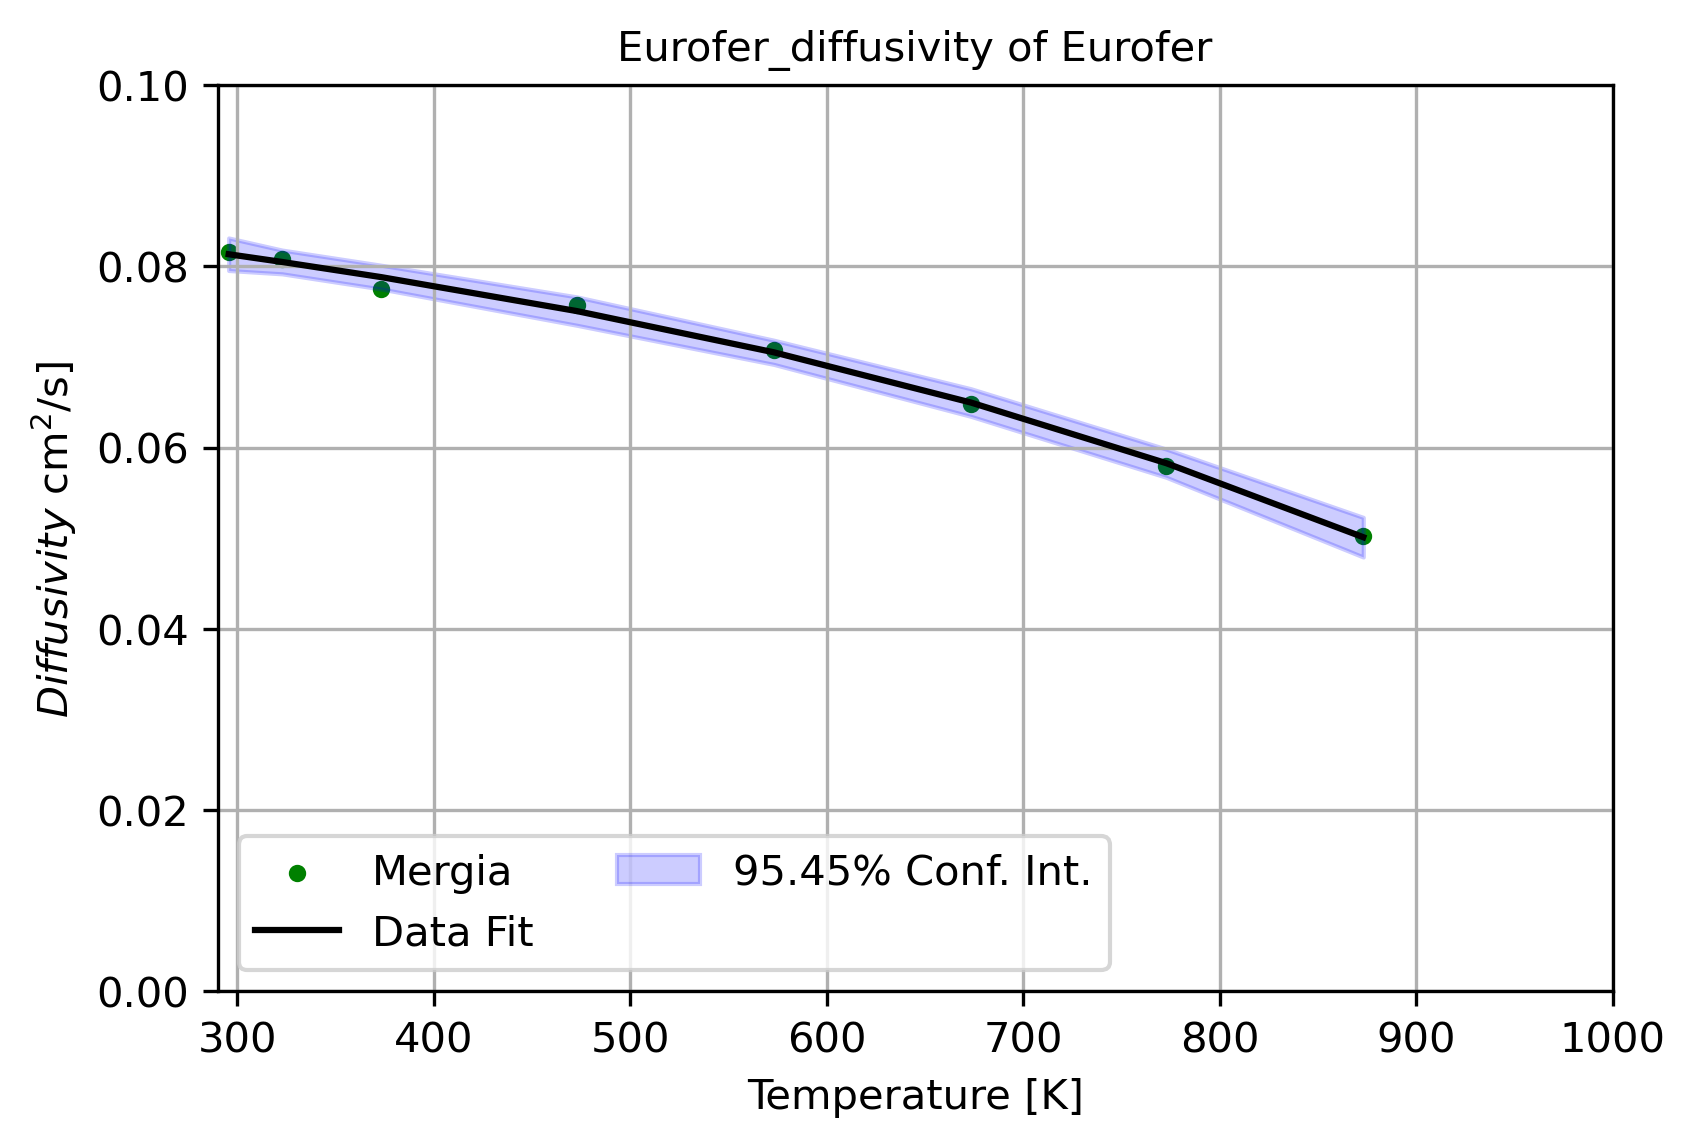

In [4]:

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

print(var_names)

# Concatenate and sort data for fitting
variables = [globals()[var_name] for var_name in var_names]
vars_x = variables[::2] 
vars_y = variables[1::2]

T, Diff = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Mergia']

fit_result = get_model_fit_and_print_it(T, Diff, fit_func='poly', poly_deg=3,\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$Diffusivity$ cm$^2$/s]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 0.1], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, Diff, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.3. Specific Heat</h3>

In [5]:
%run Model_utilities.ipynb
%run Plot_utilities.ipynb

# Excel spreadsheet and material name strings
excel_filename = 'Eurofer_data.xlsx'

# Load excel data for desired property name
material_property = "Eurofer_specific_heat"

load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=27, room_temp=293)

,EUROFER97MergiaTempK,EUROFER97MergiaSpecificHeatJ_kgK,EUROFER97TempK1,EUROFER97SpecificHeatJ_kgK
0,296.103896,448.395379,293.54795,454.68159
1,322.727273,461.489089,326.42466,467.34914
2,348.051948,475.353017,373.00000,488.52065
3,373.376623,485.365854,425.05479,509.65287
4,398.051948,496.148909,474.36986,522.20258
5,423.376623,504.621309,523.68493,543.35445
6,447.402597,513.863928,573.00000,551.60308
7,472.727273,521.566110,622.31507,572.75495
8,498.051948,530.038511,671.63014,585.30466
9,522.727273,536.970475,723.68493,610.73796


['EUROFER97MergiaTempK', 'EUROFER97MergiaSpecificHeatJ_kgK', 'EUROFER97TempK1', 'EUROFER97SpecificHeatJ_kgK']


**Fitting parameters for Eurofer Eurofer_specific_heat** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 39
    # variables        = 4
    chi-square         = 883.943790
    reduced chi-square = 25.2555369
    Akaike info crit   = 129.712441
    Bayesian info crit = 136.366688
    R-squared          = 0.99857268
[[Variables]]
    a:  4.0223e-06 +/- 1.2721e-07 (3.16%) (init = 1)
    b: -0.00617055 +/- 2.3728e-04 (3.85%) (init = 1)
    c:  3.37274344 +/- 0.14033902 (4.16%) (init = 1)
    d: -116.692873 +/- 26.0385679 (22.31%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9950
    C(b, c) = -0.9939
    C(c, d) = -0.9920
    C(a, c) = +0.9785
    C(b, d) = +0.9732
    C(a, d) = -0.9479


**The equation for Eurofer Eurofer_specific_heat is:**


4.02233e-6*T**3 - 0.00617055*T**2 + 3.37274*T - 116.693

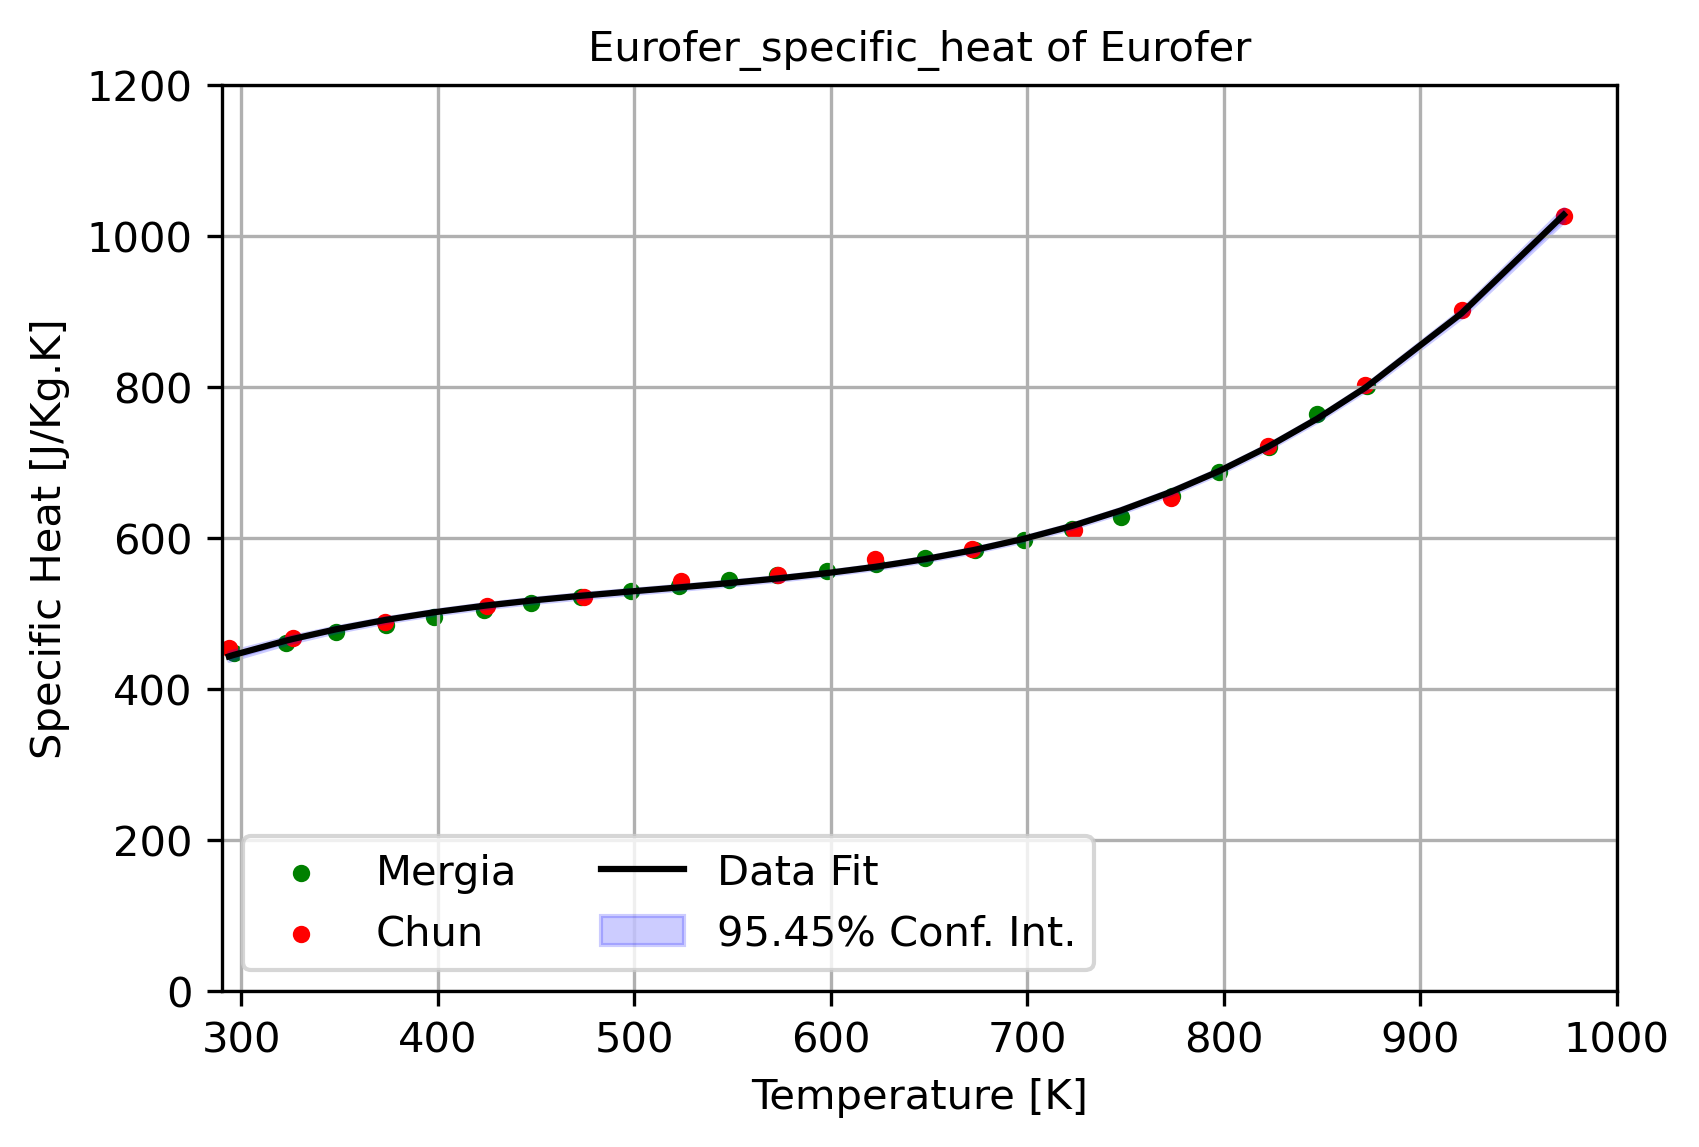

In [6]:
# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

print(var_names)

# Concatenate and sort data for fitting
variables = [globals()[var_name] for var_name in var_names]
vars_x = variables[::2] 
vars_y = variables[1::2]

T, cp = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Mergia','Chun']

fit_result = get_model_fit_and_print_it(T, cp, fit_func='poly', poly_deg=3,\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 1200], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, cp, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')